In [1]:
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
iris=load_iris()

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df['target'] = iris.target

In [8]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])

In [9]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [11]:
df.to_csv('iris.csv')

In [12]:
import matplotlib.pyplot as plt

In [13]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

Text(0, 0.5, 'sepal width (cm)')

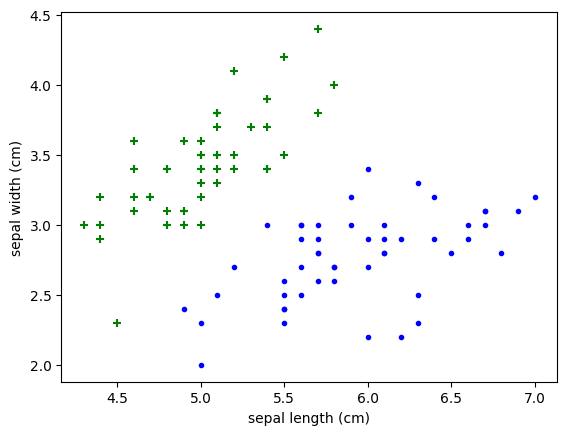

In [23]:
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue', marker='.')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

Text(0, 0.5, 'sepal width (cm)')

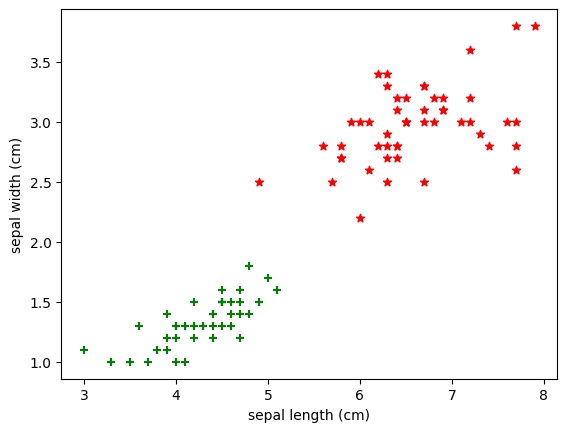

In [22]:
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='red', marker='*')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='green', marker='+')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x=df.drop(['target','flower_name'], axis='columns')

In [27]:
y=df.target

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [29]:
from sklearn.svm import SVC

In [46]:
model = SVC()

In [47]:
model.fit(x_train, y_train)

SVC()

In [48]:
model.score(x_test, y_test)

0.9666666666666667

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
confusion_matrix(y_test, model.predict(x_test))

array([[10,  0,  0],
       [ 0, 10,  1],
       [ 0,  0,  9]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

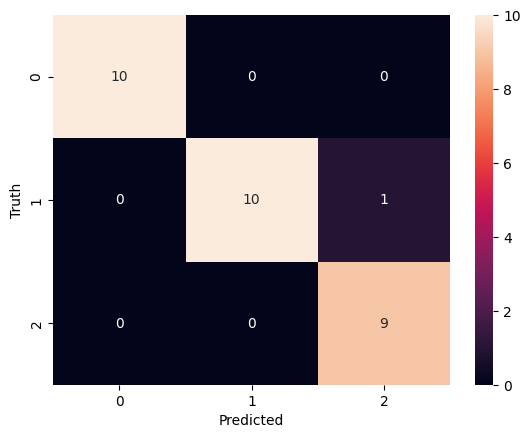

In [36]:
import seaborn as sn
sn.heatmap(confusion_matrix(y_test, model.predict(x_test)), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')